<div style="background-color: skyblue; color: black; padding: 10px;">
    <h3>Capstone Project 1: Customer Churn Prediction for T-Mobile (Compulsory) 
        : Mahesh Sharma
</h3> </div>

- In this project, develop a predictive model for estimating the customer lifetime value (CLV) of an e-commerce business. Begin by acquiring and preprocessing data using Python and SQL, extracting relevant customer and transactional data from the company's database. Using Pandas, perform advanced data analysis and manipulation to derive features for CLV prediction, such as customer demographics, purchase frequency, and monetary value.



- Then apply statistical analysis techniques to gain insights into customer behavior and calculate probabilistic metrics related to customer retention and churn. The ultimate goal is to build a robust predictive model that accurately forecasts CLV for individual customers, enabling the business to optimize marketing strategies, customer acquisition efforts, and overall revenue generation.

In [1]:
# Import necessary libraries
import numpy as np   # numpy is a library for numerical operations and handling arrays
import pandas as pd  # pandas is used for data manipulation and analysis, providing data structures like DataFrame
from sklearn.datasets import make_classification  # used to generate synthetic classification datasets for testing and evaluation
from sklearn.model_selection import train_test_split  # splits the dataset into training and testing sets for model evaluation
from sklearn.preprocessing import StandardScaler  # standardizes features by removing the mean and scaling to unit variance
from sklearn.ensemble import RandomForestClassifier  # an ensemble classifier that uses multiple decision trees for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # metrics to evaluate model performance
import matplotlib.pyplot as plt  # used for creating static, animated, and interactive visualizations in Python
import seaborn as sns  # a data visualization library based on matplotlib for creating attractive and informative statistical graphics
from sklearn.svm import SVC  # support vector classifier for classification tasks, used for both linear and non-linear classification

### Dataset Overview

The T-mobile Churn Rate Dataset provides comprehensive information on customer demographics, service usage, contract details, and churn status. It includes customer ID, gender, senior citizen status, partner and dependent status, service usage metrics (e.g., phone service, internet service), contract types, payment methods, monthly charges, total charges, tenure, customer satisfaction metrics, and churn status.

Key columns include:

customerID: Unique identifier for each customer.
gender, SeniorCitizen, Partner, Dependents: Demographic details.
tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport: Service usage details.
Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges: Payment and contract details.
Churn: Target variable indicating if the customer churned.

## Data Exploration and Preparation

### Data Set Acquisition

#### Source of data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
#Read the dataset
#Specify the local directory address where the dataset is stored
dataset = pd.read_csv((r'C:\Users\macma\OneDrive\Desktop\Data Analytics\Projects and Assignments\WA_Fn-UseC_-Telco-Customer-Churn.csv')) 


In [3]:
df = pd.DataFrame(dataset)  # converts the dataset into a pandas DataFrame for easier data manipulation and analysis
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Lesson 2: Data Cleaning and Exploration

1. Data Overview and Checking for Missing Values

In [4]:
# Check for missing values in the dataset.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe() #Display basic Statistics

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



2. Handling Missing Values

In [6]:
# Convert TotalCharges to numeric and coerce errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Coerces non-numeric to NaN
# Fill missing values in TotalCharges by reassigning
df['TotalCharges'] = df['TotalCharges'].fillna(0)  # Replaces NaN with 0 by reassigning


##### 2.1 Drop Unnecessary Columns
    - Remove customerID as it is not useful for prediction.


In [7]:
# Drop customerID column as it doesn't contribute to model features
df.drop(['customerID'], axis=1, inplace=True)


3. Identifying and Removing Duplicates

In [8]:
# Identifying and Removing Duplicates
# Check for duplicates
duplicate_count = df.duplicated().sum()  # Summarizes the number of duplicates for removal if any
df.drop_duplicates(inplace=True)  # Removes duplicate records to ensure data integrity



4.  Exploratory Data Analysis (EDA)

<Axes: xlabel='Churn'>

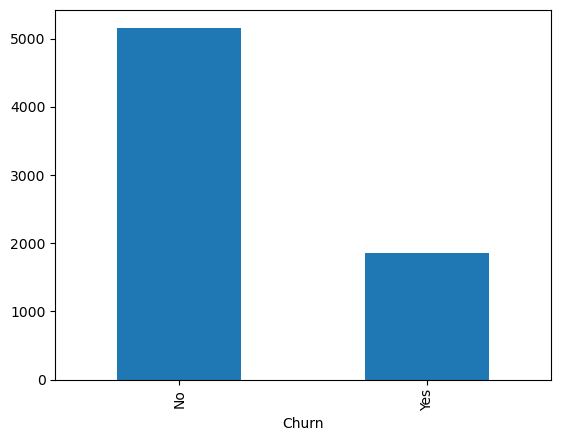

In [9]:
# Summary statistics to understand data distribution
df.describe()  # Provides an overview of the data distribution across numeric columns

# Visualize churn counts
churn_counts = df['Churn'].value_counts()
churn_counts.plot(kind='bar')  # Displays churn distribution as a bar plot


5.  Data Types Check

In [10]:
# Checking data types for categorical vs numerical columns
df.dtypes  # Helps identify any non-numeric types that should be converted


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
# Display basic information about the dataset
print("Data Information:")
df.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-nu

In [12]:
# Display the first few rows of the dataframe
print("\nFirst 5 Rows of the DataFrame:")
df.head()


First 5 Rows of the DataFrame:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


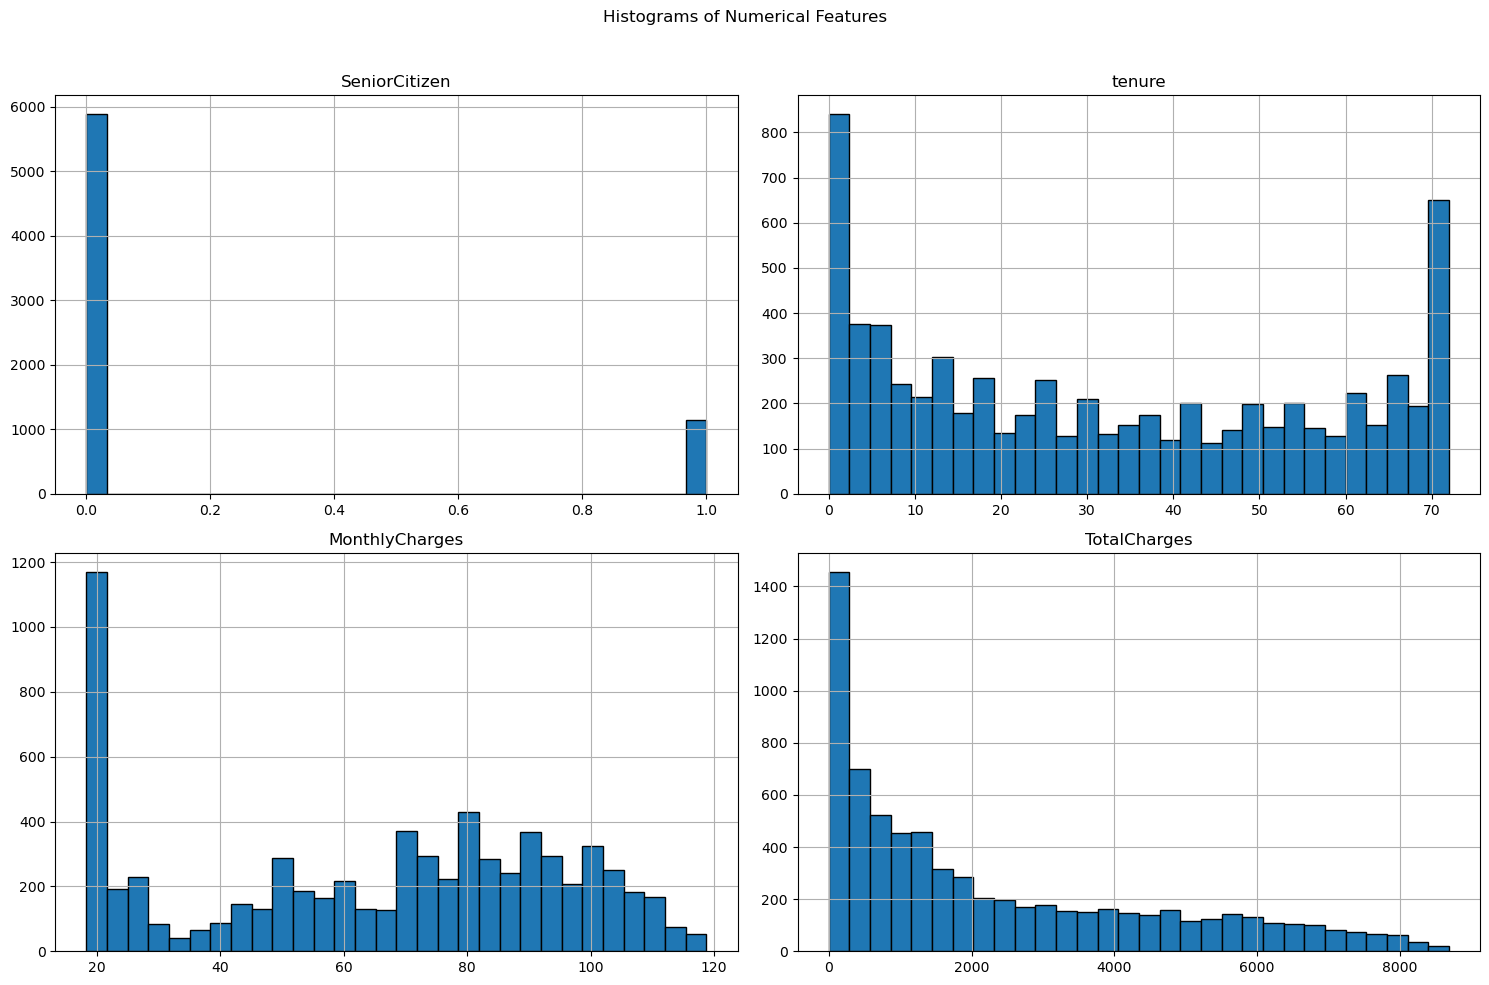

In [13]:
# Purpose: Plot histograms for numerical features to visualize their distributions
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Calculate KPIs

In [14]:
# Ensure the Churn column is properly encoded for calculation
# Check the unique values in the 'Churn' column
print("Unique values in 'Churn' column:", df['Churn'].unique())

# 1. Churn Rate
total_customers = len(df)  # Total number of customers in the dataset
churned_customers = df[df['Churn'] == 1]  # Customers with churn labeled as 1 (indicating churned customers)
churn_rate = (len(churned_customers) / total_customers) * 100  # Churn rate in percentage

# 2. Average Tenure
average_tenure = df['tenure'].mean()  # Calculate the average tenure of customers

# 3. Average Monthly Charges
average_monthly_charges = df['MonthlyCharges'].mean()  # Calculate the average monthly charges

# 6. Percentage of Customers with Additional Services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
percentage_additional_services = {}

for service in services:
    if service in df.columns:  # Ensure the service column exists in the dataset
        # Calculate percentage of customers with 'Yes' (encoded as 1)
        percentage_additional_services[service] = (df[service].value_counts(normalize=True).get(1, 0) * 100)

# Display the results
print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Average Tenure: {average_tenure:.2f} months")
print(f"Average Monthly Charges: ${average_monthly_charges:.2f}")

# Additional output for percentage of customers with additional services
print("Percentage of Customers with Additional Services:")
for service, percentage in percentage_additional_services.items():
    print(f"{service}: {percentage:.2f}%")


Unique values in 'Churn' column: ['No' 'Yes']
Churn Rate: 0.00%
Average Tenure: 32.47 months
Average Monthly Charges: $64.85
Percentage of Customers with Additional Services:
OnlineSecurity: 28.76%
OnlineBackup: 34.60%
DeviceProtection: 34.50%
TechSupport: 29.11%
StreamingTV: 38.56%
StreamingMovies: 38.91%


C:\Users\macma\AppData\Local\Temp\ipykernel_30852\3087724936.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_additional_services[service] = (df[service].value_counts(normalize=True).get(1, 0) * 100)
C:\Users\macma\AppData\Local\Temp\ipykernel_30852\3087724936.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_additional_services[service] = (df[service].value_counts(normalize=True).get(1, 0) * 100)
C:\Users\macma\AppData\Local\Temp\ipykernel_30852\3087724936.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be t

In [15]:
# 1. Gender Distribution
gender_distribution = df['gender'].value_counts()  # Count the distribution of each gender

# 2. Senior Citizen Status Distribution
senior_citizen_distribution = df['SeniorCitizen'].value_counts()  # Count the distribution for SeniorCitizen status (1 or 0)

# 3. Distribution by Gender and Senior Citizen Status
gender_senior_distribution = df.groupby(['gender', 'SeniorCitizen']).size().unstack()  # Group by gender and SeniorCitizen

# Display the Results
print("Gender Distribution:")
print(gender_distribution)

print("\nSenior Citizen Distribution:")
print(senior_citizen_distribution)

print("\nGender and Senior Citizen Distribution:")
print(gender_senior_distribution)


Gender Distribution:
gender
Male      3541
Female    3480
Name: count, dtype: int64

Senior Citizen Distribution:
SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64

Gender and Senior Citizen Distribution:
SeniorCitizen     0    1
gender                  
Female         2913  567
Male           2967  574


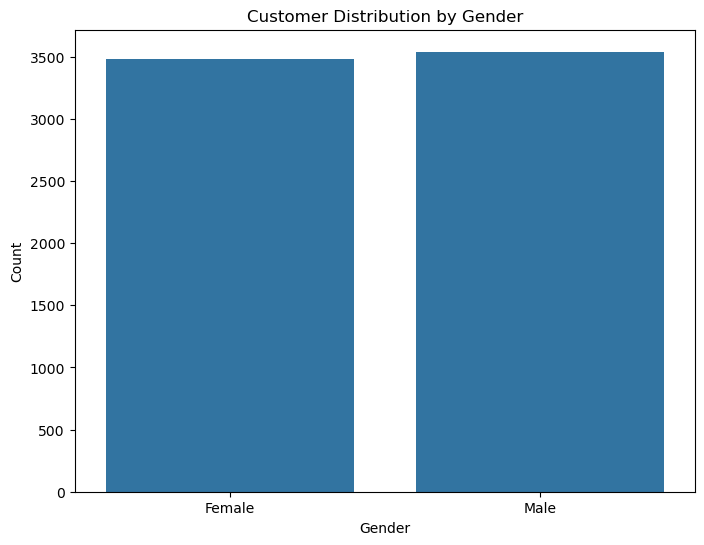

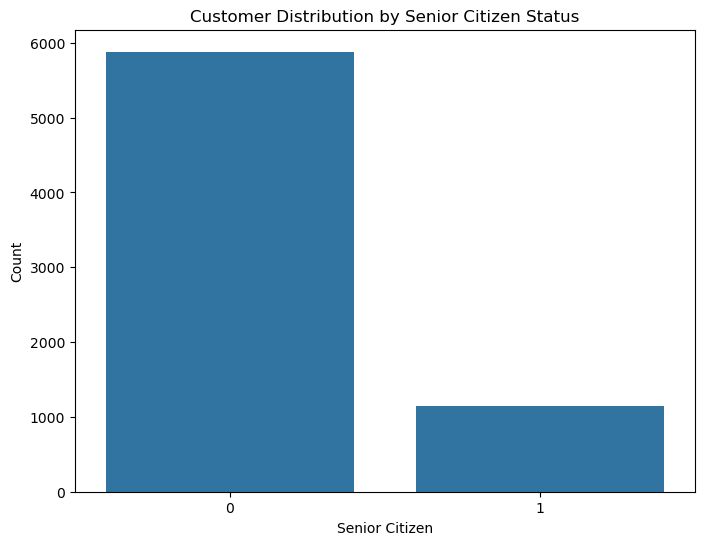

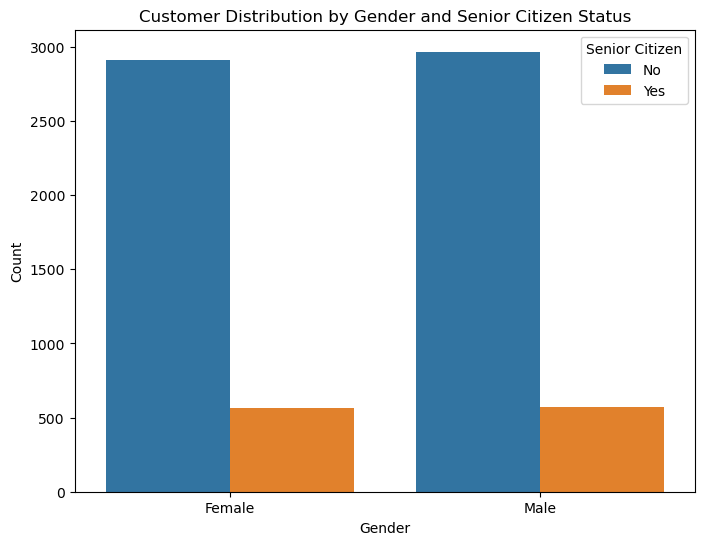

In [16]:
# Gender Distribution plot

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gender Distribution Plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.countplot(data=df, x='gender')  # Plot count of each gender category
plt.title('Customer Distribution by Gender')  # Set plot title
plt.xlabel('Gender')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.show()  # Display the plot

# 2. Senior Citizen Status Distribution Plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.countplot(data=df, x='SeniorCitizen')  # Plot count of Senior Citizen status (1 or 0)
plt.title('Customer Distribution by Senior Citizen Status')  # Set plot title
plt.xlabel('Senior Citizen')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.show()  # Display the plot

# 3. Distribution by Gender and Senior Citizen Status Plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.countplot(data=df, x='gender', hue='SeniorCitizen')  # Plot count of each gender with SeniorCitizen status as hue
plt.title('Customer Distribution by Gender and Senior Citizen Status')  # Set plot title
plt.xlabel('Gender')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.legend(title='Senior Citizen', labels=['No', 'Yes'])  # Set legend title and labels
plt.show()  # Display the plot


In [17]:
# Percentage of customers with partners
partners_percentage = (df['Partner'].value_counts(normalize=True) * 100).get(1, 0)  # Get percentage for 'Yes' (encoded as 1)

# Percentage of customers with dependents
dependents_percentage = (df['Dependents'].value_counts(normalize=True) * 100).get(1, 0)  # Get percentage for 'Yes' (encoded as 1)

# Display the results
print(f"Percentage of customers with partners: {partners_percentage:.2f}%")
print(f"Percentage of customers with dependents: {dependents_percentage:.2f}%")


Percentage of customers with partners: 48.45%
Percentage of customers with dependents: 30.05%


C:\Users\macma\AppData\Local\Temp\ipykernel_30852\1920656884.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partners_percentage = (df['Partner'].value_counts(normalize=True) * 100).get(1, 0)  # Get percentage for 'Yes' (encoded as 1)
C:\Users\macma\AppData\Local\Temp\ipykernel_30852\1920656884.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dependents_percentage = (df['Dependents'].value_counts(normalize=True) * 100).get(1, 0)  # Get percentage for 'Yes' (encoded as 1)


C:\Users\macma\AppData\Local\Temp\ipykernel_30852\2208621246.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partners_percentage = (df['Partner'].value_counts(normalize=True) * 100).get(1, 0)  # Percentage for 'Partner' encoded as 1
C:\Users\macma\AppData\Local\Temp\ipykernel_30852\2208621246.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dependents_percentage = (df['Dependents'].value_counts(normalize=True) * 100).get(1, 0)  # Percentage for 'Dependents' encoded as 1


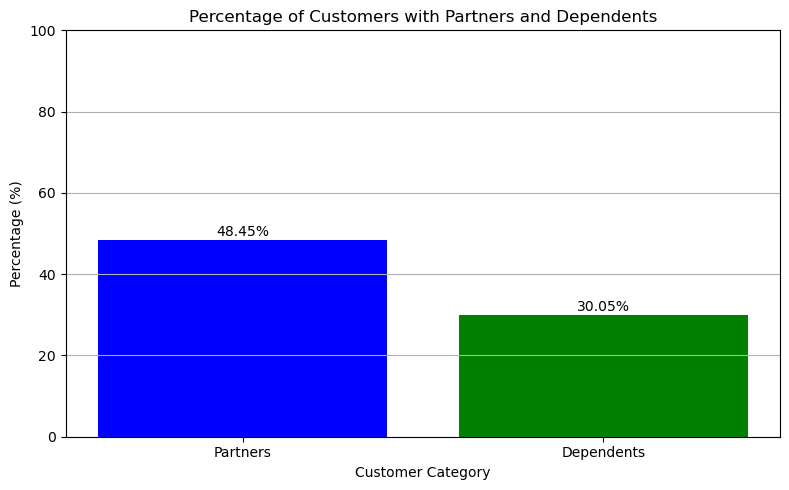

In [18]:
# calculate and plot the percentages of customers with partners and dependents 

import matplotlib.pyplot as plt

# Calculate percentages
partners_percentage = (df['Partner'].value_counts(normalize=True) * 100).get(1, 0)  # Percentage for 'Partner' encoded as 1
dependents_percentage = (df['Dependents'].value_counts(normalize=True) * 100).get(1, 0)  # Percentage for 'Dependents' encoded as 1

# Prepare data for plotting
labels = ['Partners', 'Dependents']
percentages = [partners_percentage, dependents_percentage]

# Plotting
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(labels, percentages, color=['blue', 'green'])  # Create bar plot with specified colors
plt.xlabel('Customer Category')  # Set x-axis label
plt.ylabel('Percentage (%)')  # Set y-axis label
plt.title('Percentage of Customers with Partners and Dependents')  # Set plot title
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y')  # Add grid lines along y-axis

# Display percentages on bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')  # Display percentage labels above bars

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot


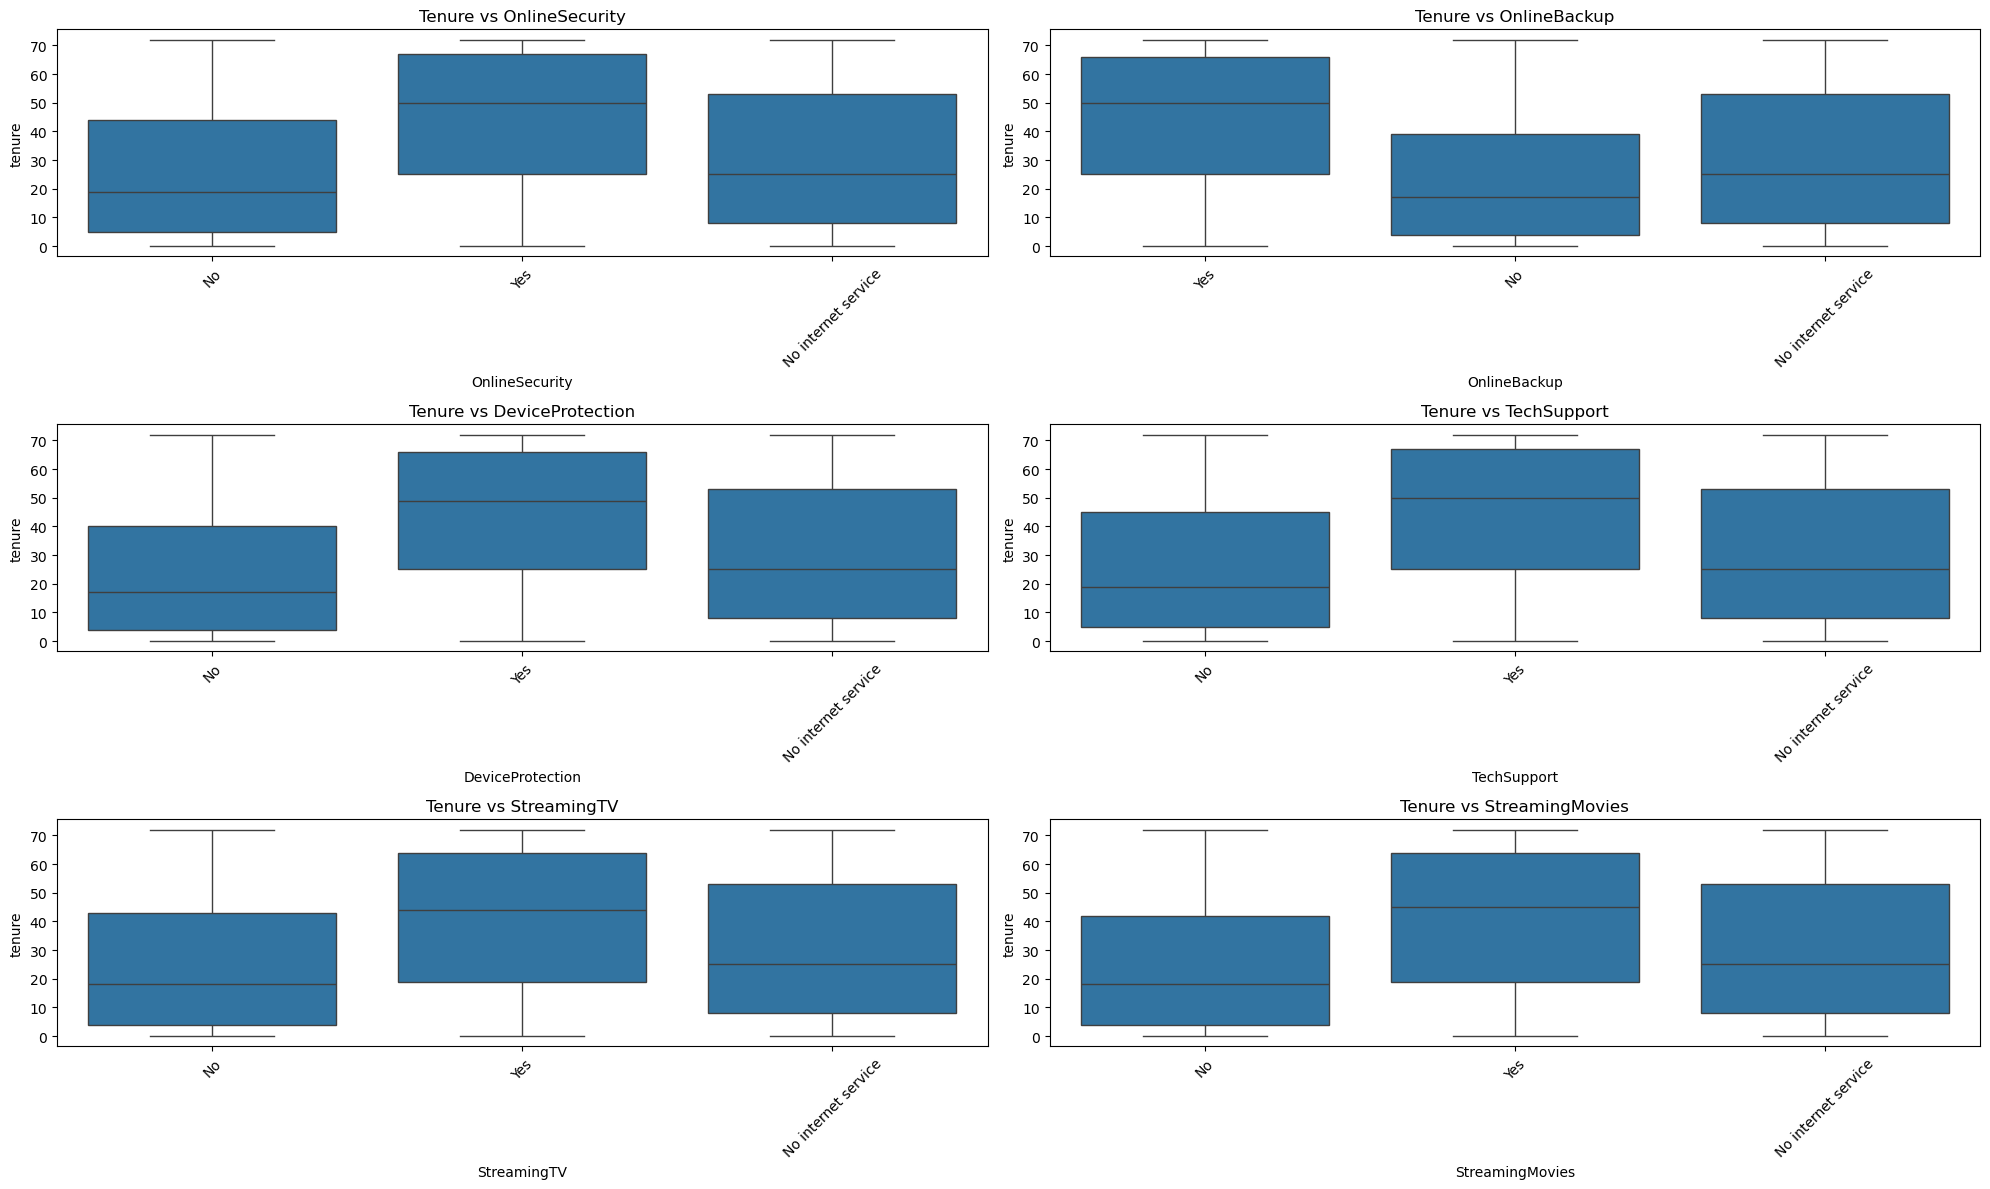

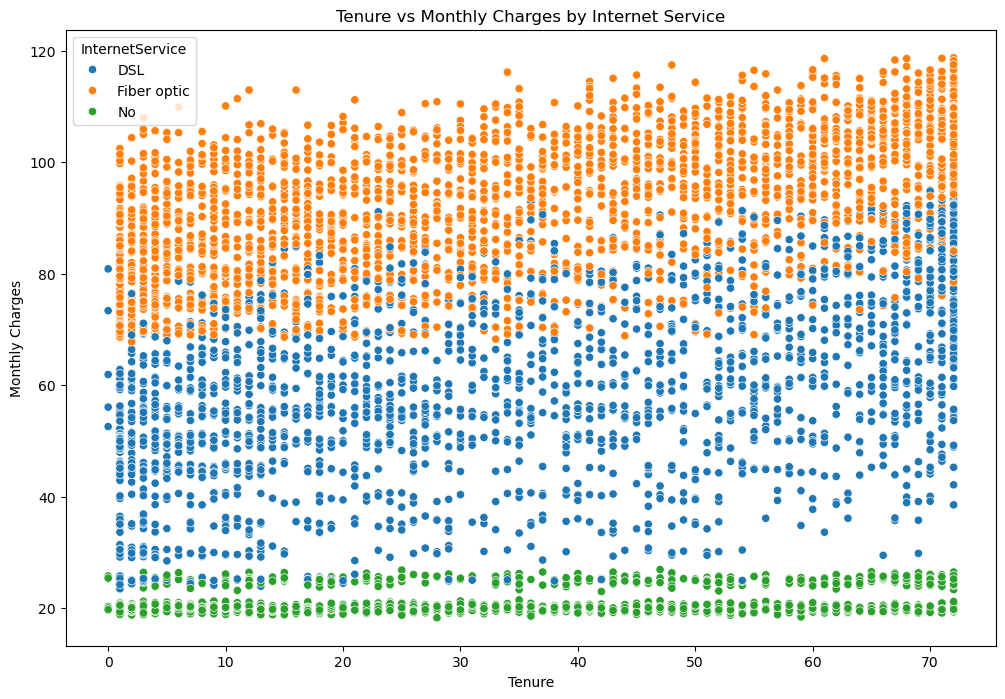

In [21]:
#creating boxplots and a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for tenure by service features
plt.figure(figsize=(20, 12))  # Set figure size for boxplots
for i, feature in enumerate(service_features, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid for subplots
    sns.boxplot(data=df, x=feature, y='tenure')  # Boxplot of tenure by service feature
    plt.title(f'Tenure vs {feature}')  # Title for each subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust layout for spacing
plt.show()  # Display all boxplots

# Scatter plot of tenure vs monthly charges, colored by InternetService
plt.figure(figsize=(12, 8))  # Set figure size for scatter plot
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='InternetService')  # Scatter plot colored by InternetService
plt.title('Tenure vs Monthly Charges by Internet Service')  # Set plot title
plt.xlabel('Tenure')  # Set x-axis label
plt.ylabel('Monthly Charges')  # Set y-axis label
plt.show()  # Display the scatter plot


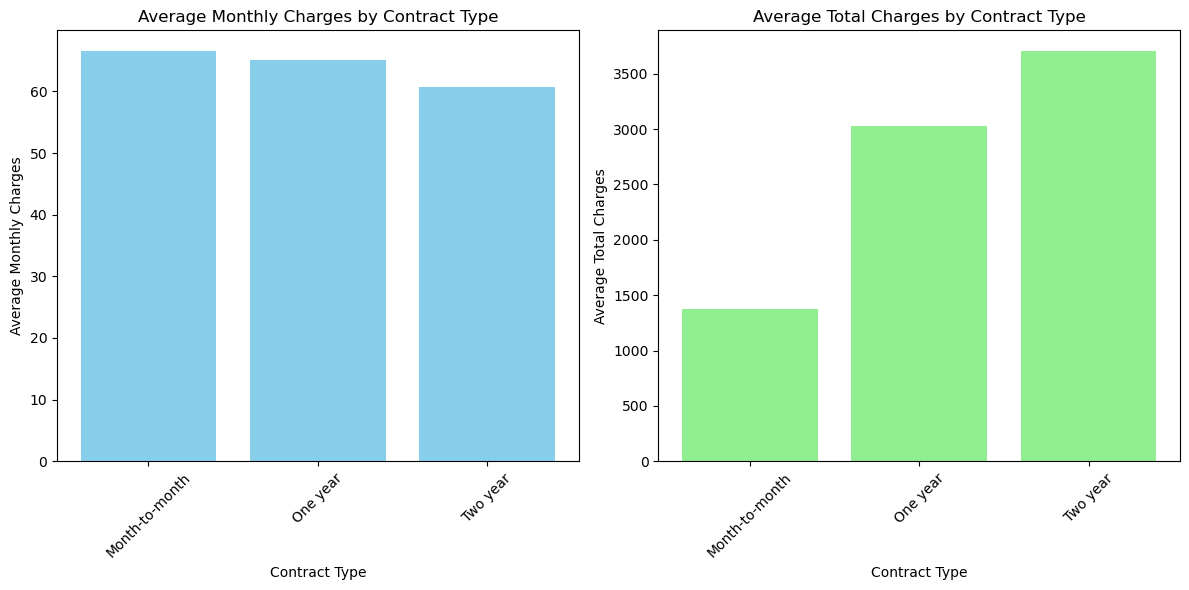

In [22]:
# Create bar charts showing the average monthly and total charges per contract type.

import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'MonthlyCharges' and 'TotalCharges' to numeric, coercing errors to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Drop rows with NaN values in 'MonthlyCharges' or 'TotalCharges'
df.dropna(subset=['MonthlyCharges', 'TotalCharges'], inplace=True)

# 3. Group by 'Contract' and calculate the mean of 'MonthlyCharges' and 'TotalCharges'
contract_charges = df.groupby('Contract').agg({
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).reset_index()

# 4. Plotting Average Monthly Charges and Total Charges by Contract Type
plt.figure(figsize=(12, 6))  # Set figure size

# Subplot for Average Monthly Charges
plt.subplot(1, 2, 1)
plt.bar(contract_charges['Contract'], contract_charges['MonthlyCharges'], color='skyblue')  # Bar plot for MonthlyCharges
plt.xlabel('Contract Type')  # Label x-axis
plt.ylabel('Average Monthly Charges')  # Label y-axis
plt.title('Average Monthly Charges by Contract Type')  # Set plot title
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Subplot for Average Total Charges
plt.subplot(1, 2, 2)
plt.bar(contract_charges['Contract'], contract_charges['TotalCharges'], color='lightgreen')  # Bar plot for TotalCharges
plt.xlabel('Contract Type')  # Label x-axis
plt.ylabel('Average Total Charges')  # Label y-axis
plt.title('Average Total Charges by Contract Type')  # Set plot title
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()  # Display the plots


In [25]:
# Print out the resulting DataFrame showing averages by contract type. 

# Convert 'MonthlyCharges' and 'TotalCharges' to numeric, coercing errors to NaN
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'MonthlyCharges' or 'TotalCharges'
df.dropna(subset=['MonthlyCharges', 'TotalCharges'], inplace=True)

# Group by 'Contract' and calculate the mean of 'MonthlyCharges' and 'TotalCharges'
contract_charges = df.groupby('Contract').agg({
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).reset_index()

# Displaying numerical results
print("Average Monthly Charges and Total Charges by Contract Type:")
print(contract_charges)


Average Monthly Charges and Total Charges by Contract Type:
         Contract  MonthlyCharges  TotalCharges
0  Month-to-month       66.572203   1376.867389
1        One year       65.048608   3032.622878
2        Two year       60.770413   3706.934336


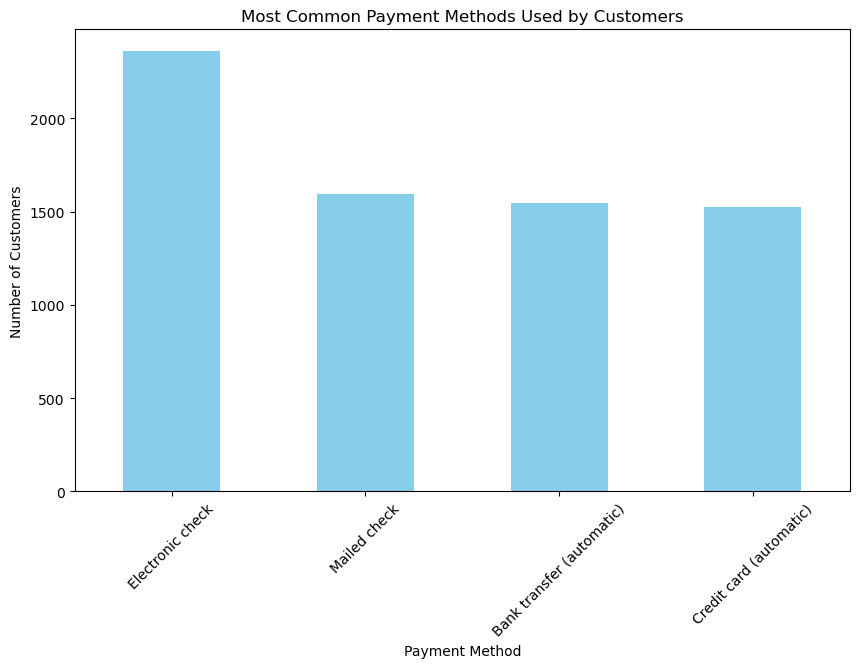

In [26]:
# Visualize the frequency of each payment method for easy comparison.

import matplotlib.pyplot as plt

# Calculate the frequency of each payment method
payment_method_counts = df['PaymentMethod'].value_counts()  # Count occurrences of each payment method

# Plotting the payment method distribution
plt.figure(figsize=(10, 6))  # Set figure size
payment_method_counts.plot(kind='bar', color='skyblue')  # Create a bar chart with specified color
plt.xlabel('Payment Method')  # Label x-axis
plt.ylabel('Number of Customers')  # Label y-axis
plt.title('Most Common Payment Methods Used by Customers')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


In [27]:
# Calculate churn rate for each payment method
churn_rate_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

# If churn is encoded as 1, rename that column to 'Churn Rate' for clarity
if 1 in churn_rate_by_payment.columns:
    churn_rate_by_payment['Churn Rate'] = churn_rate_by_payment[1]
else:
    churn_rate_by_payment['Churn Rate'] = churn_rate_by_payment['Yes']

# Display the churn rates
print("Churn Rate by Payment Method:")
print(churn_rate_by_payment[['Churn Rate']])


Churn Rate by Payment Method:
Churn                      Churn Rate
PaymentMethod                        
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.451462
Mailed check                 0.189223


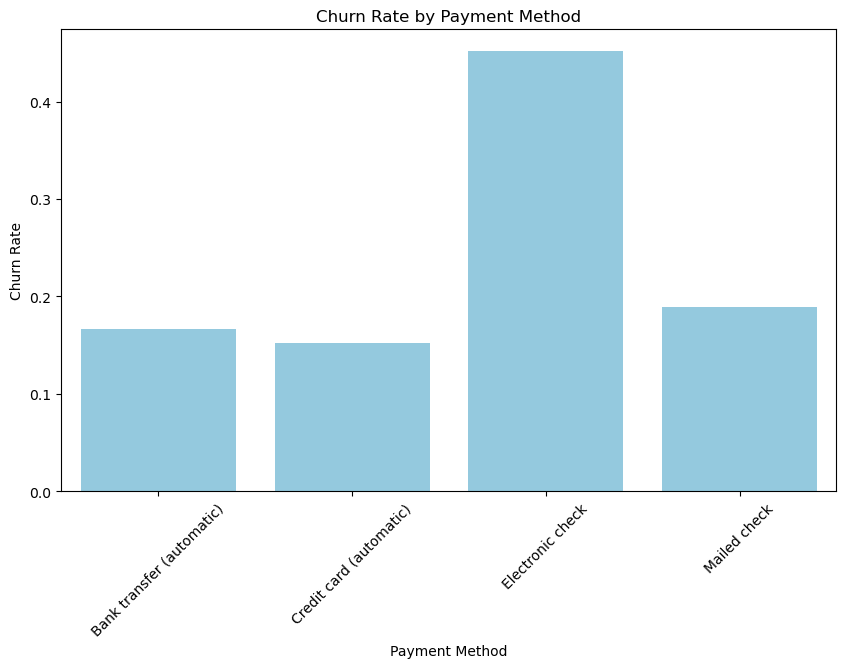

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure churn rates have been calculated and stored in 'churn_rate_by_payment'
# Plot churn rates by payment method
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x=churn_rate_by_payment.index, y=churn_rate_by_payment['Churn Rate'], color='skyblue')  # Bar plot with custom color
plt.xlabel('Payment Method')  # Set x-axis label
plt.ylabel('Churn Rate')  # Set y-axis label
plt.title('Churn Rate by Payment Method')  # Set plot title
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()  # Display the plot


In [29]:
# Perform a Chi-Square test to assess the association between PaymentMethod and Churn
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table between PaymentMethod and Churn
contingency_table = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display Chi-Square Statistic and P-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpret p-value for significance
if p < 0.05:
    print("There is a significant association between PaymentMethod and Churn.")
else:
    print("There is no significant association between PaymentMethod and Churn.")


Chi-Square Statistic: 643.9227551176966
P-value: 3.0267752570875056e-139
There is a significant association between PaymentMethod and Churn.


In [30]:
# Perform a Chi-Square test for multiple categorical variables to assess their association with churn

from scipy.stats import chi2_contingency
import pandas as pd

# Define function for chi-square test
def chi_square_test(df, col):
    contingency_table = pd.crosstab(df[col], df['Churn'])  # Create contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Perform chi-square test
    return p  # Return p-value

# Perform chi-square test for each categorical variable
categorical_vars = ['PaymentMethod', 'Contract', 'InternetService', 'MultipleLines', 'TechSupport']
results_chi2 = {}

for var in categorical_vars:
    p_value = chi_square_test(df, var)  # Get p-value for each variable
    results_chi2[var] = p_value  # Store p-value in results dictionary

# Print results
print("Chi-Square Test Results:")
for var, p_value in results_chi2.items():
    if p_value < 0.05:
        print(f"There is a significant association between {var} and Churn (p-value: {p_value:.4f})")
    else:
        print(f"No significant association between {var} and Churn (p-value: {p_value:.4f})")



Chi-Square Test Results:
There is a significant association between PaymentMethod and Churn (p-value: 0.0000)
There is a significant association between Contract and Churn (p-value: 0.0000)
There is a significant association between InternetService and Churn (p-value: 0.0000)
There is a significant association between MultipleLines and Churn (p-value: 0.0021)
There is a significant association between TechSupport and Churn (p-value: 0.0000)


C:\Users\macma\AppData\Local\Temp\ipykernel_30852\2739142168.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


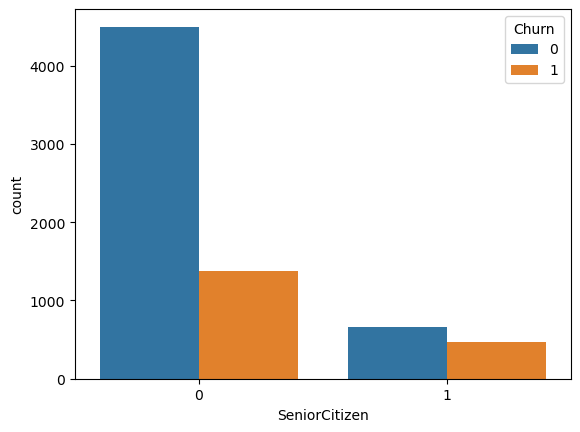

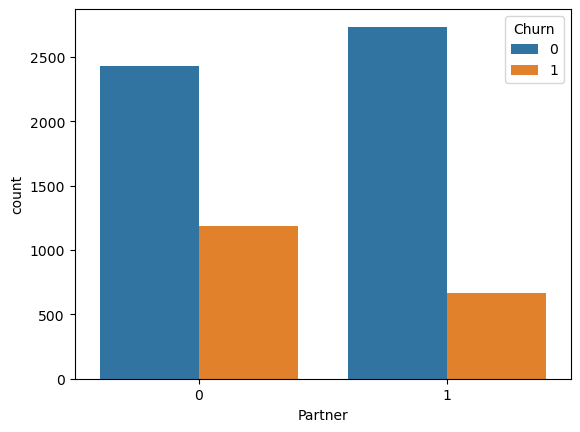

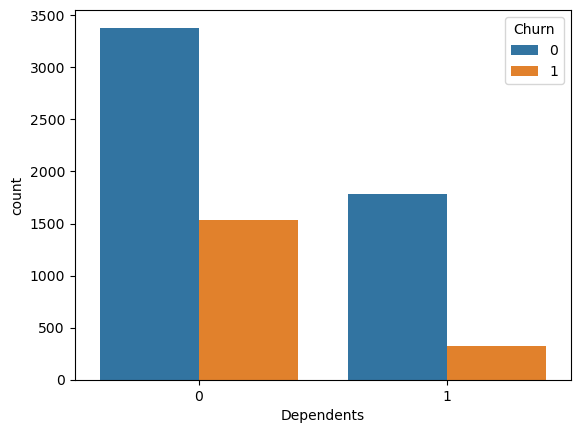

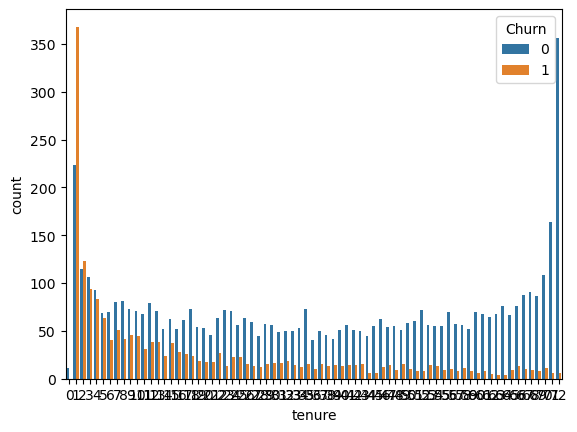

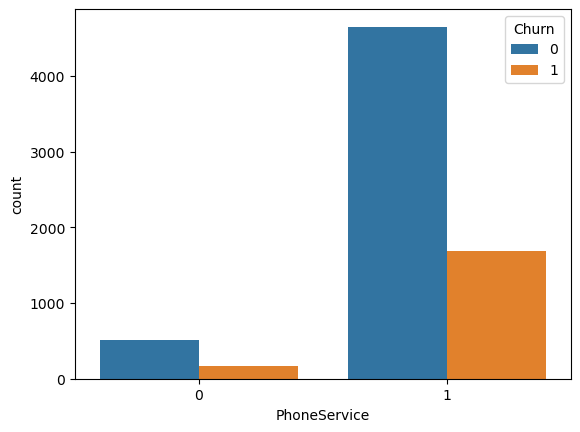

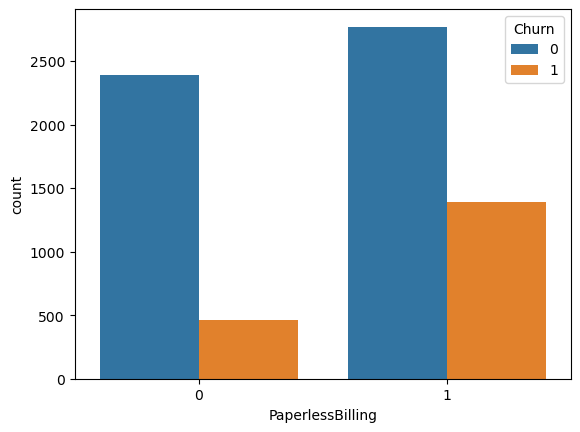

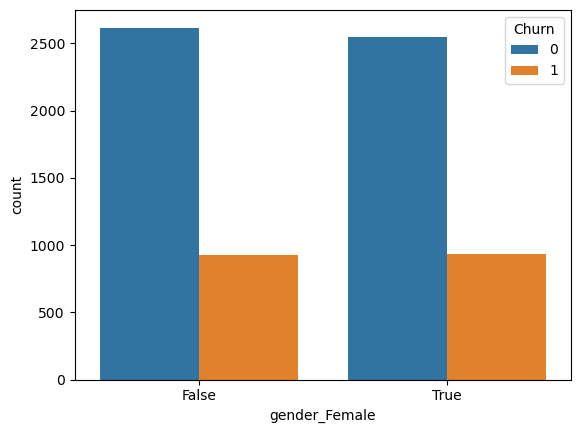

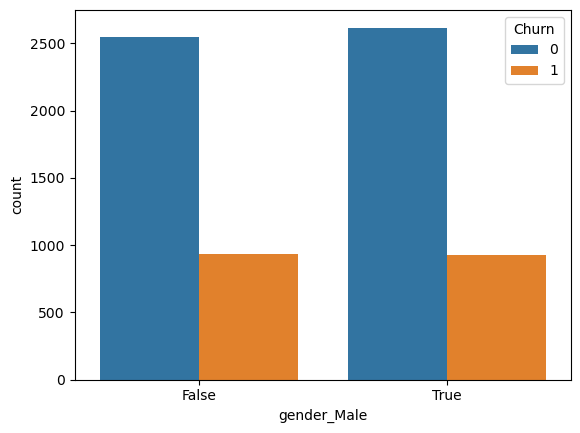

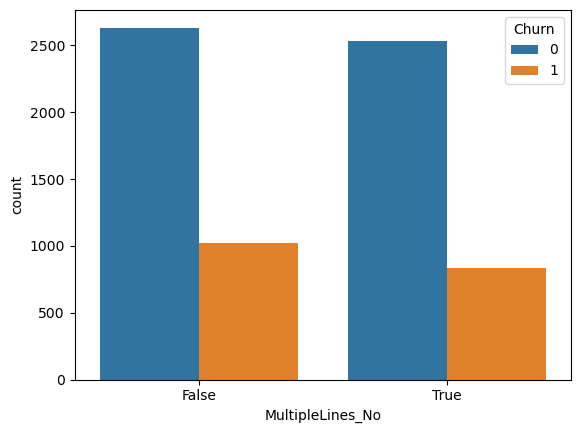

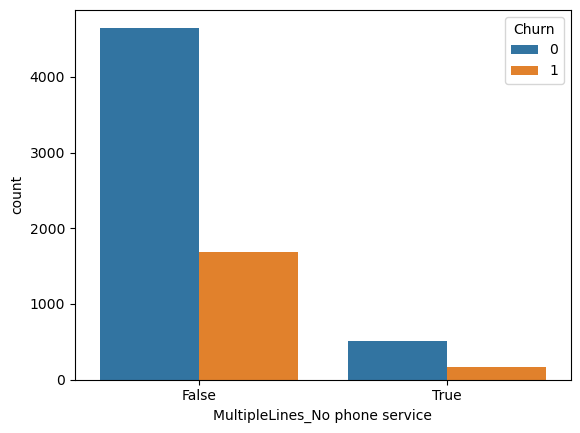

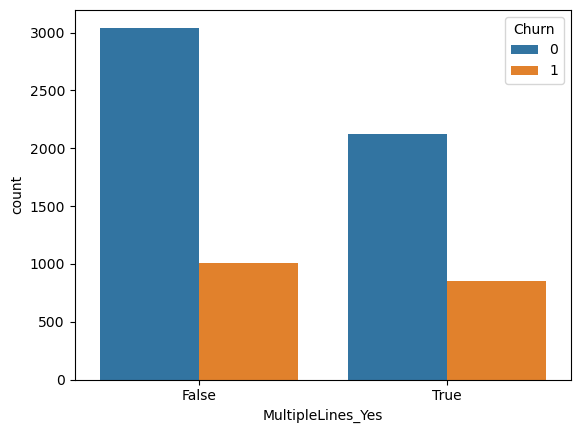

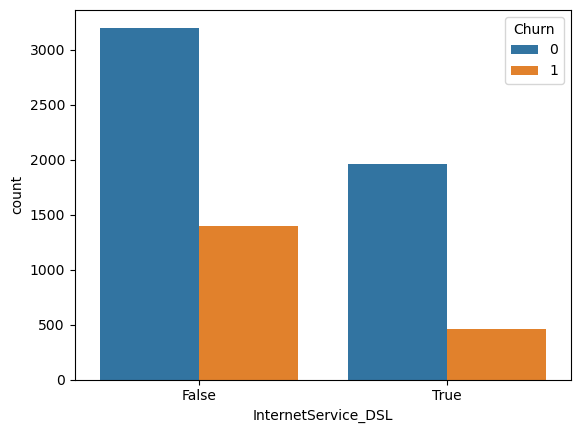

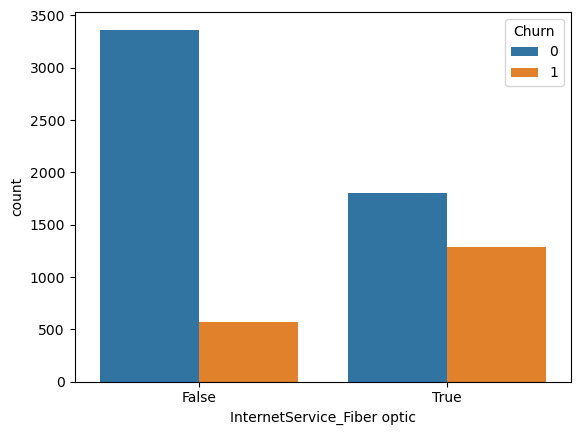

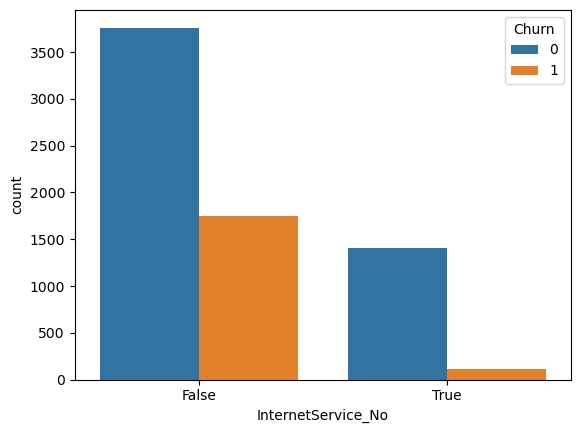

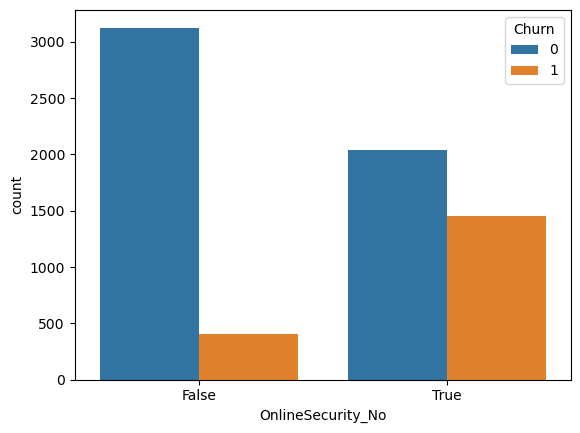

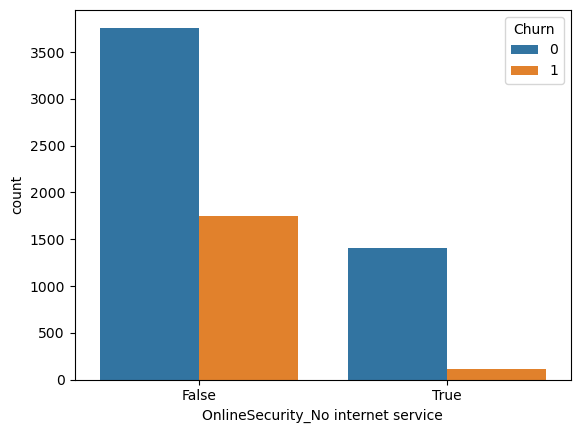

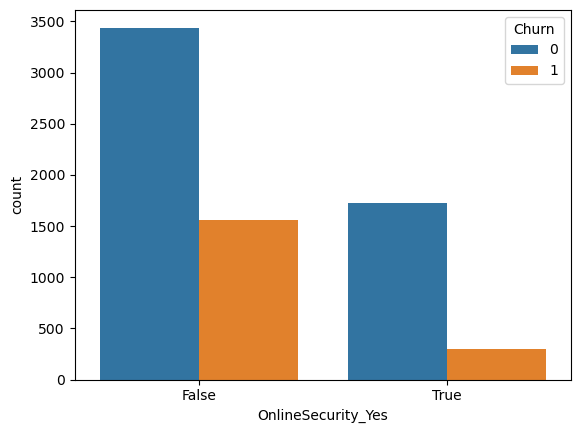

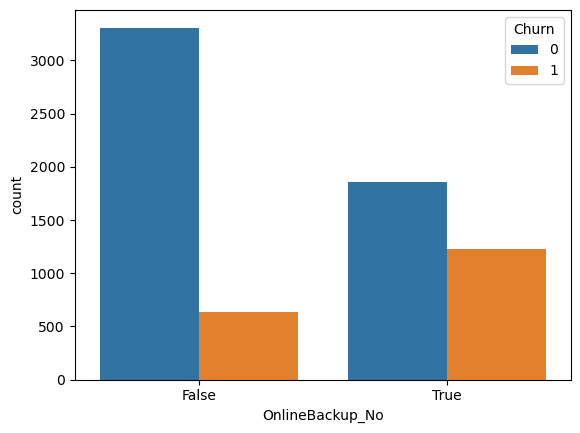

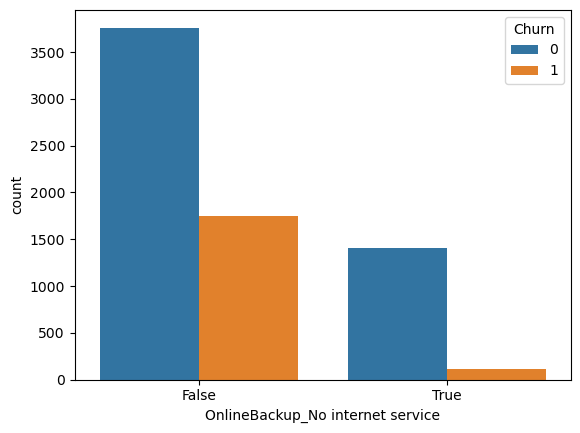

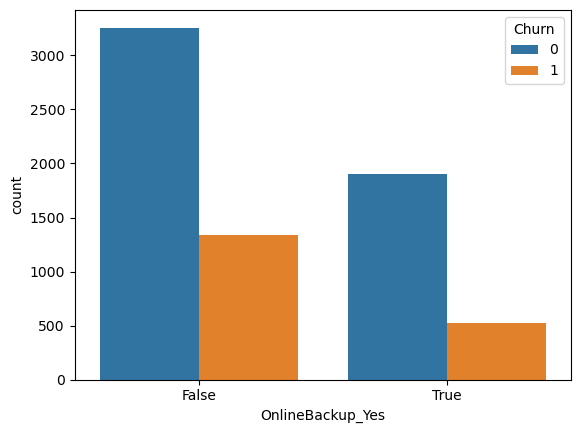

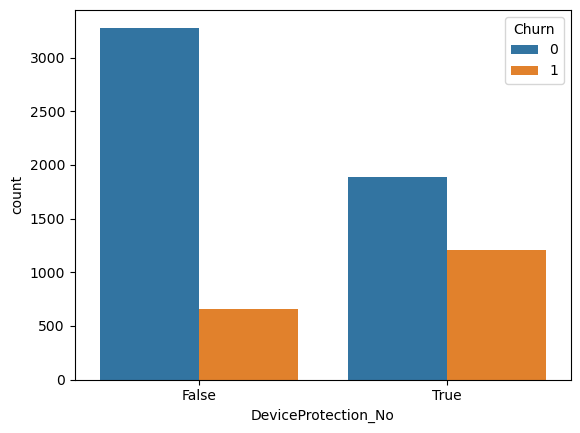

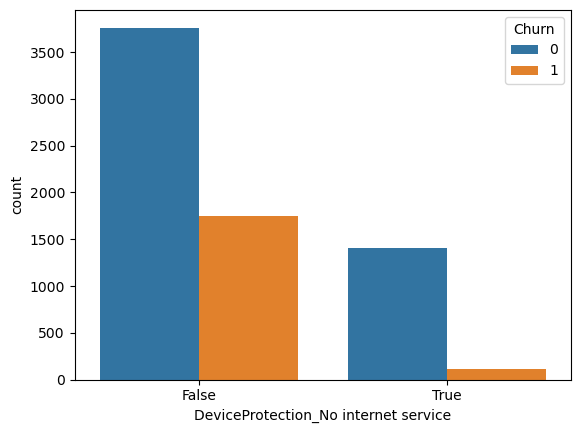

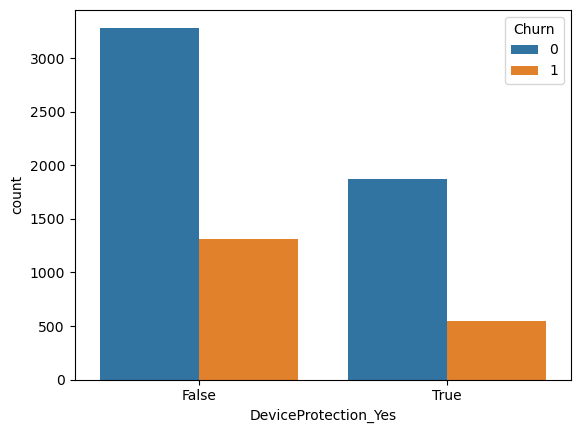

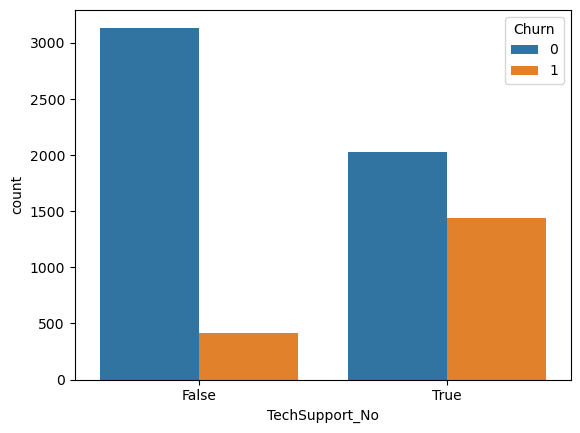

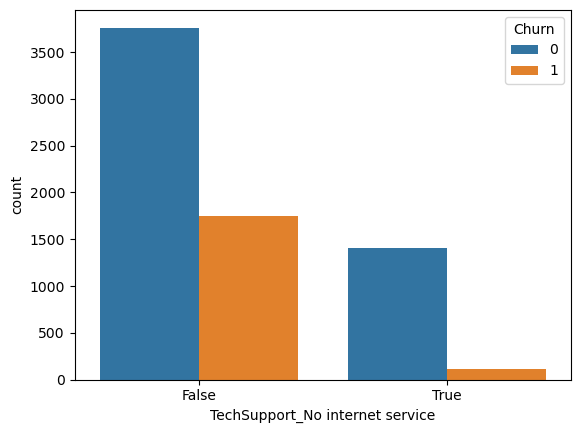

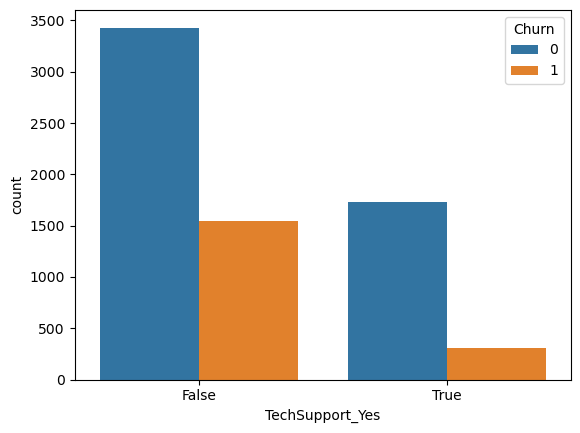

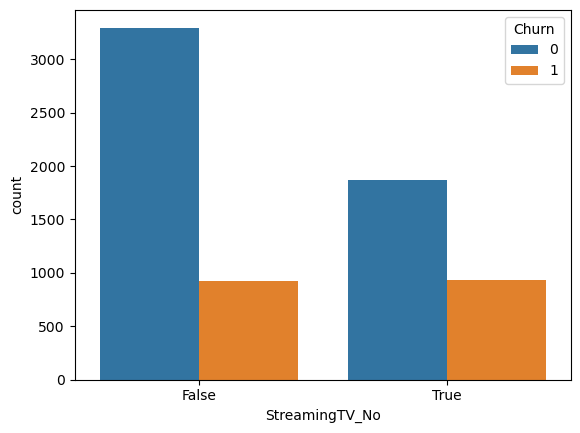

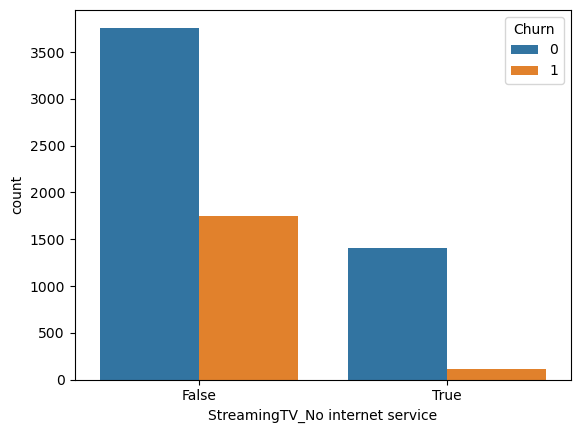

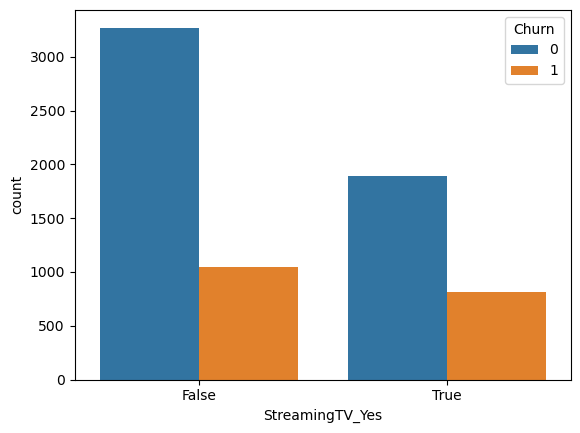

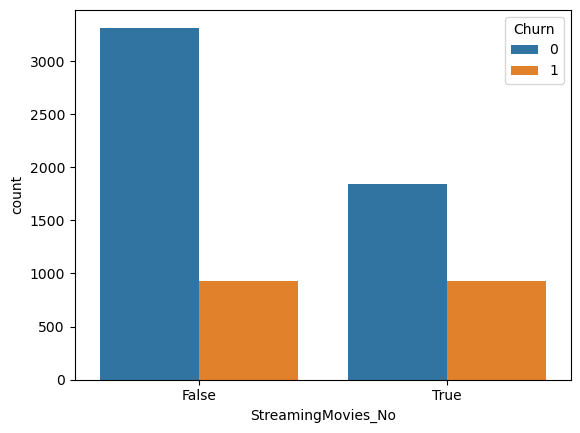

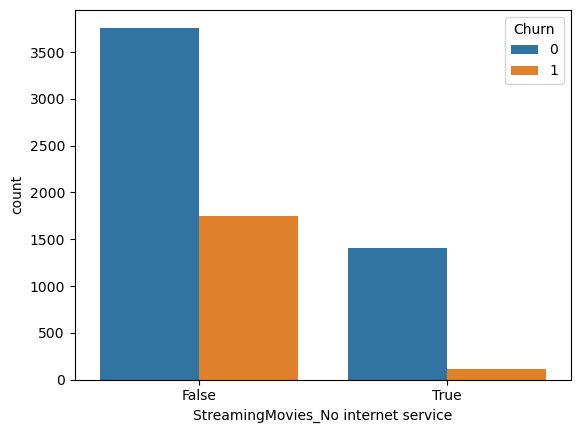

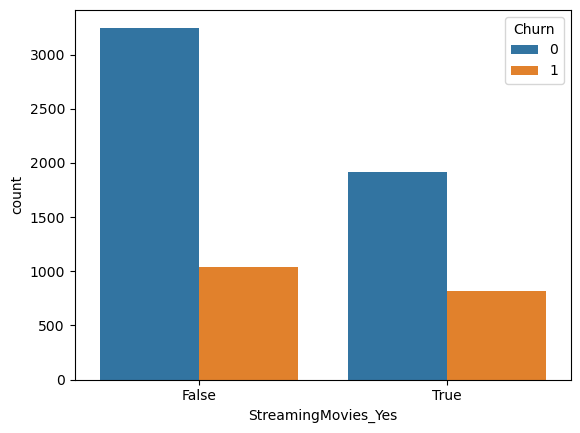

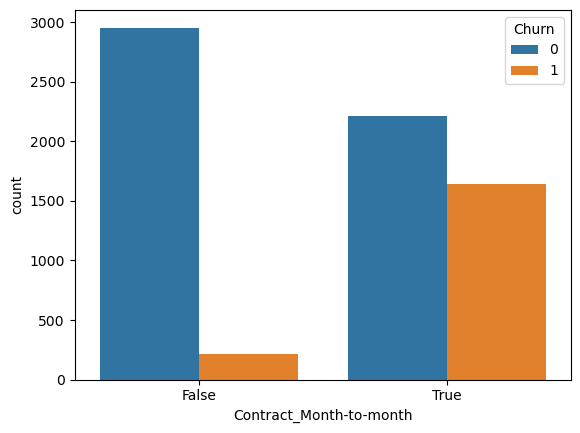

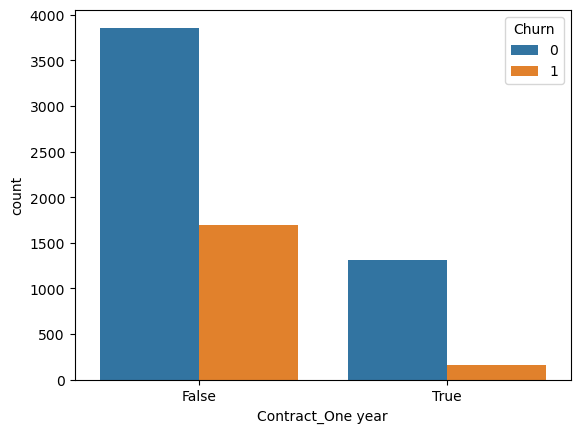

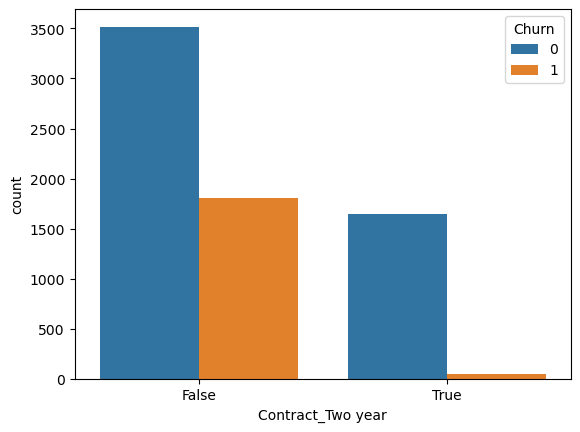

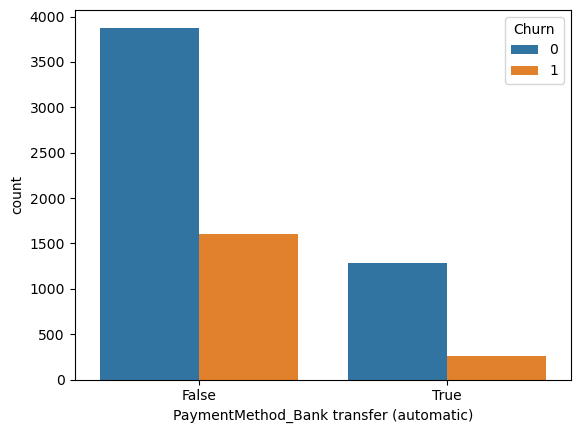

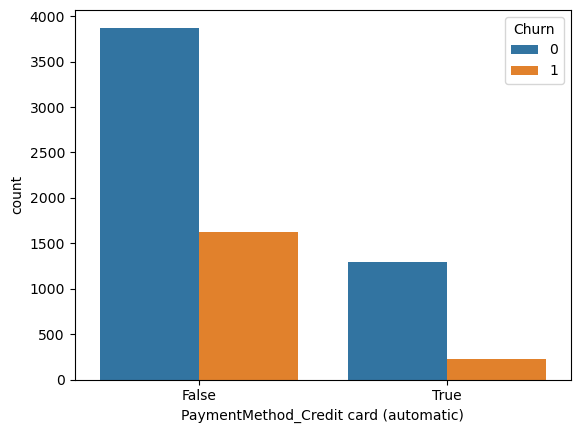

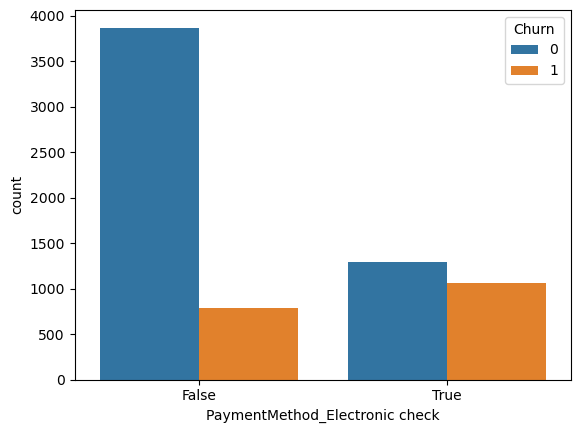

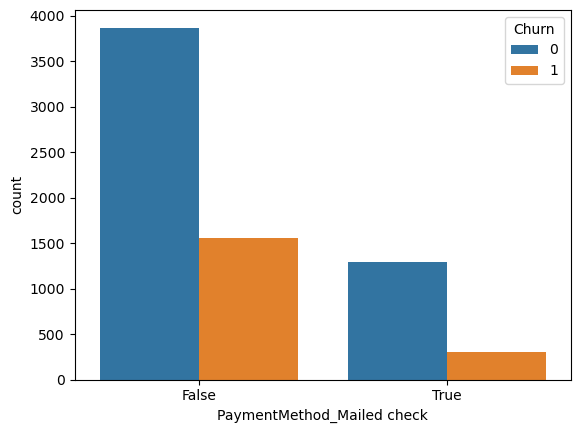

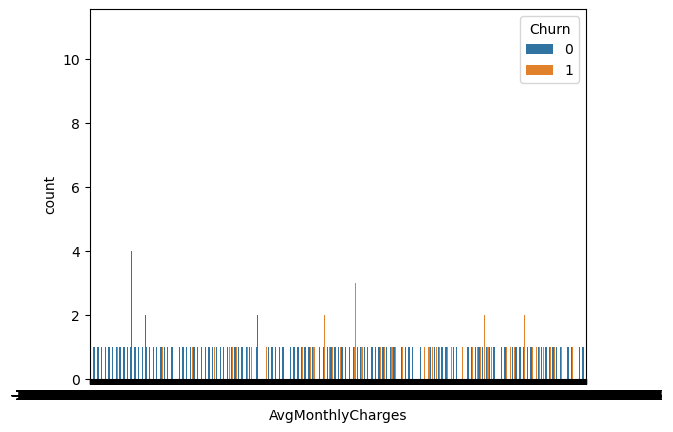

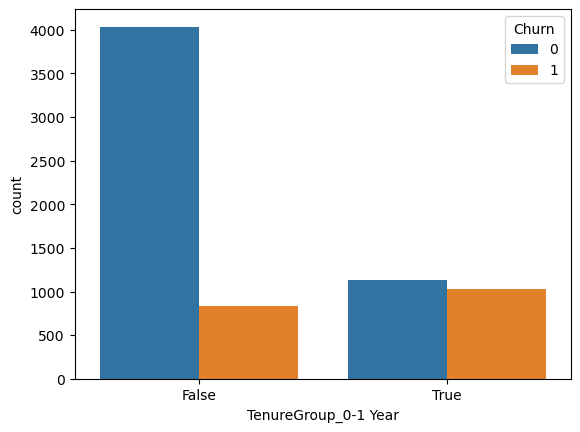

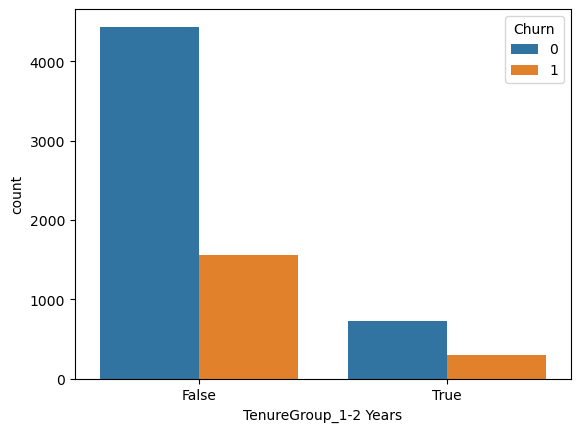

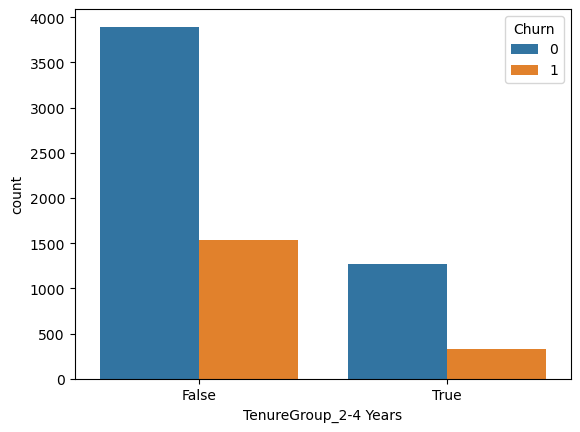

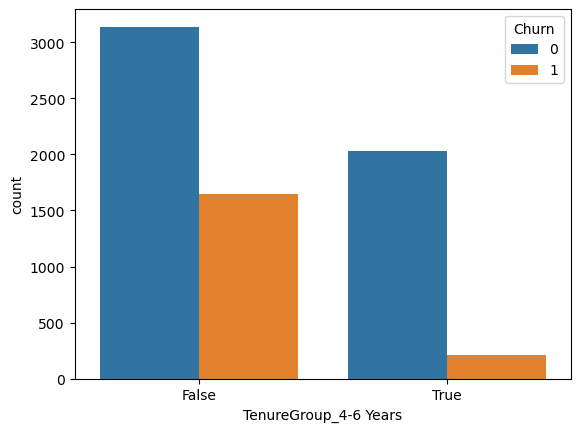

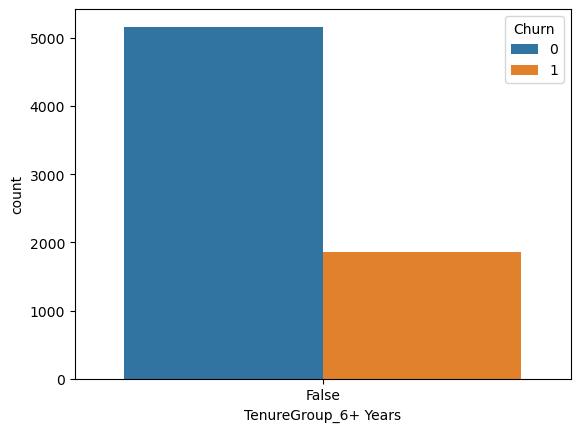

In [56]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

#### Correlation of all predictors with 'Churn'

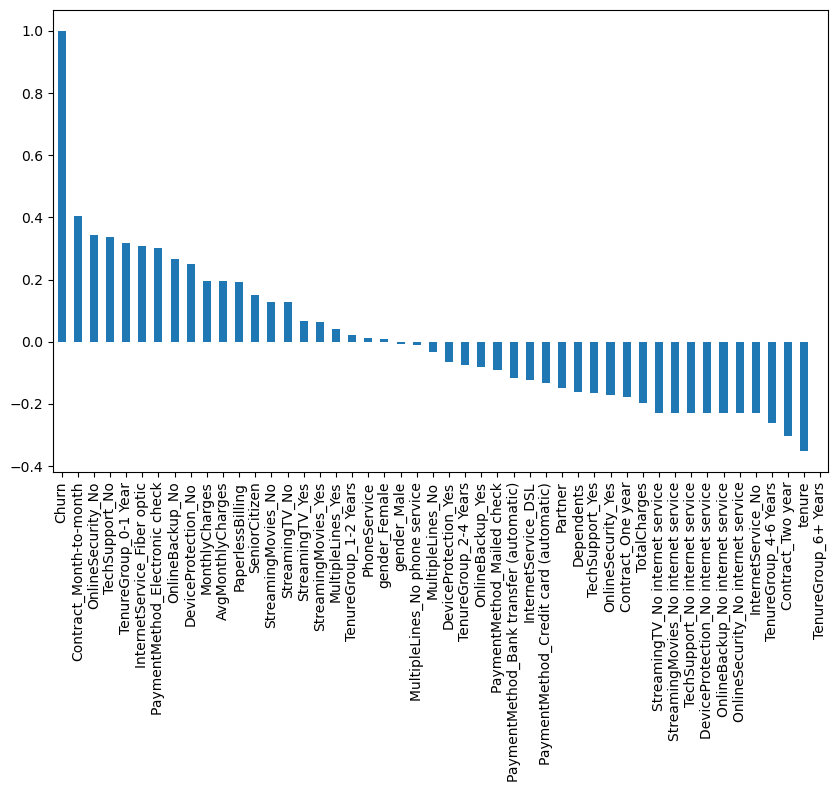

In [50]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

Key Insights:

* HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

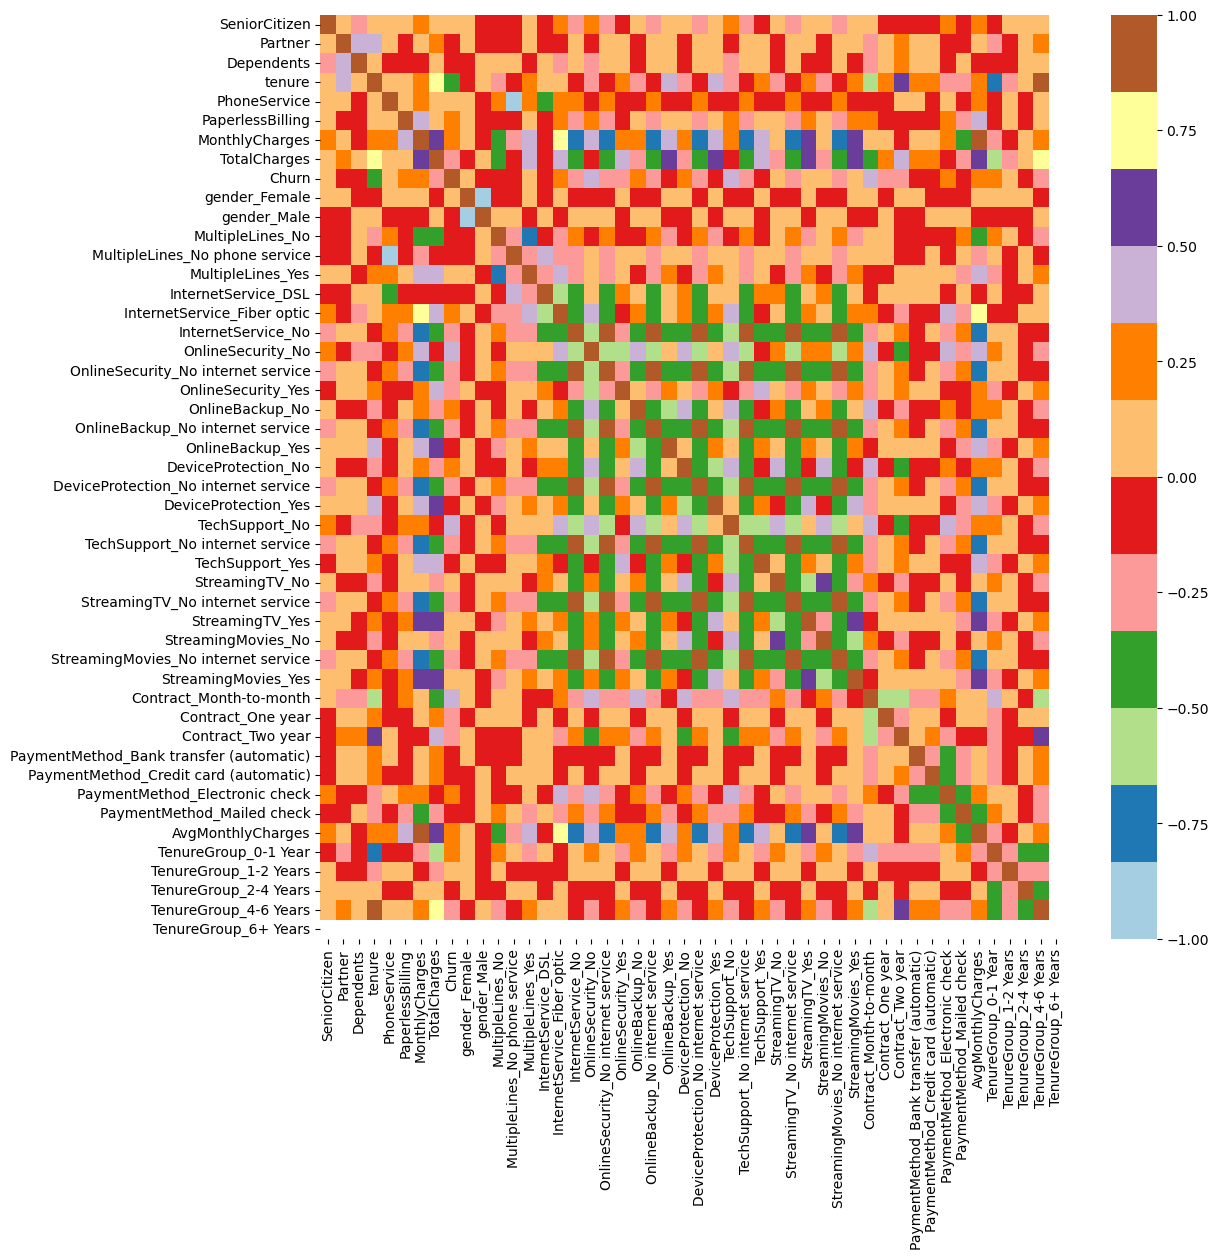

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

#### Churn by Monthly Charges and Total Charges

C:\Users\macma\AppData\Local\Temp\ipykernel_30852\3612628790.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
C:\Users\macma\AppData\Local\Temp\ipykernel_30852\3612628790.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

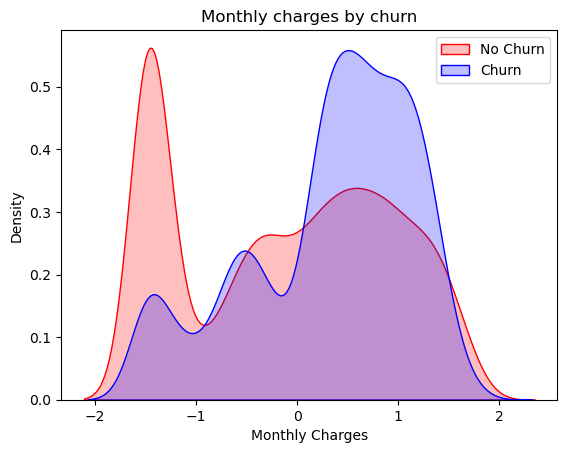

In [60]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#### Insight: Churn is high when Monthly Charges ar high

Quick insights :

* Electronic check medium are the highest churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

### Lesson 3: Feature Engineering

1. Creating Binary Columns with Yes/No Values as 1/0
    - Binary Encoding for Columns: Convert columns like Partner, Dependents, PhoneService, etc., which contain Yes/No values.

In [33]:
# Convert Yes/No columns to binary 1/0
binary_columns = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']  # Churn is our target variable

# Apply conversion to each binary column
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)  # Map Yes to 1, No to 0


In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


2. One-Hot Encoding for Categorical Variables

In [35]:

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 
                  'StreamingMovies','Contract', 'PaymentMethod'])


# Display the first few rows to verify one-hot encoding
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,...,True,False,False,True,False,False,False,False,True,False


3. Feature Derivation: Average Monthly Charges

In [36]:
# Calculate average monthly charges based on TotalCharges and tenure
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure']  # Creates a feature for monthly spending patterns

# Fill any resulting NaN values in AvgMonthlyCharges by reassigning the column
df['AvgMonthlyCharges'] = df['AvgMonthlyCharges'].fillna(0)  # Replaces NaN values with 0


4. Customer Segmentation by Tenure

In [37]:
# Increase the upper bound slightly to ensure unique bin edges
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72, df['tenure'].max() + 1], labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-6 Years', '6+ Years'])


In [38]:
# Apply one-hot encoding to TenureGroup to ensure it’s in numeric format
df = pd.get_dummies(df, columns=['TenureGroup'])


5. Feature Scaling 

In [39]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Replace any infinite values with NaN, then fill NaNs with the median of each column to handle missing data
df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']] = df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']].replace([np.inf, -np.inf], np.nan)
df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']] = df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']].fillna(df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']].median())

# Initialize scaler
scaler = StandardScaler()

# Apply scaler to numeric columns
df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']])  # Standardizes numeric columns


In [40]:
# Display the first few rows of the engineered dataframe
print("\nDataFrame after Feature Engineering:")  # prints a message indicating the display of the engineered DataFrame
df.head()  # prints the first five rows of the DataFrame to show the engineered features


DataFrame after Feature Engineering:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgMonthlyCharges,TenureGroup_0-1 Year,TenureGroup_1-2 Years,TenureGroup_2-4 Years,TenureGroup_4-6 Years,TenureGroup_6+ Years
0,0,1,0,1,0,1,-1.164135,-0.995686,0,True,...,False,False,True,False,-1.155046,True,False,False,False,False
1,0,0,0,34,1,0,-0.262811,-0.175262,0,False,...,False,False,False,True,-0.304635,False,False,True,False,False
2,0,0,0,2,1,1,-0.365914,-0.961142,1,False,...,False,False,False,True,-0.354175,True,False,False,False,False
3,0,0,0,45,0,0,-0.750058,-0.196769,0,False,...,True,False,False,False,-0.789553,False,False,True,False,False
4,0,0,0,2,1,1,0.194503,-0.941951,1,True,...,False,False,True,False,0.364872,True,False,False,False,False


#### Lesson 4: Model Development

To build and train a machine learning model for predicting customer churn, we’ll go through the following steps:

    1. Data Preparation: Define target and features, split the data.
    2. Model Selection: Test multiple algorithms.
    3. Model Training and Evaluation: Train models, evaluate performance, and optimize.
    4. Hyperparameter Tuning: Use Grid Search or Randomized Search to optimize models.
    5. Final Model Selection: Select the best-performing model.

In [41]:
# Import necessary libraries for model development and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


1. Data Preparation
Define the target (Churn) and features. 

In [42]:
# Define the features (X) and the target variable (y)
X = df.drop('Churn', axis=1)  # Drop the target column to define features
y = df['Churn']  # Target variable for churn prediction


In [43]:
# Split the data into training and testing sets (70% training, 30% testing) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # Stratify to maintain class balance


2. Model Selection
   - We’ll start by training multiple models to compare performance: Logistic Regression, Random Forest, and Gradient Boosting.

In [44]:
# Initialize the models for comparison
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Logistic Regression model
rf = RandomForestClassifier(random_state=42)  # Random Forest model
gb = GradientBoostingClassifier(random_state=42)  # Gradient Boosting model


3. Model Traning and Evaluation
   - Train each model and evaluate its performance on the test set.

In [45]:
# Dictionary to store models for easy iteration
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

# Dictionary to store results for each model
results = {}

# Loop through each model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)  # Fit model to training data
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy score
    report = classification_report(y_test, y_pred)  # Get detailed classification report
    matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix for class prediction
    
    # Store results for each model
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': matrix
    }
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")



Model: Logistic Regression
Accuracy: 0.8083
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1550
           1       0.68      0.52      0.59       557

    accuracy                           0.81      2107
   macro avg       0.76      0.72      0.73      2107
weighted avg       0.80      0.81      0.80      2107

Confusion Matrix:
 [[1411  139]
 [ 265  292]]


Model: Random Forest
Accuracy: 0.7945
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1550
           1       0.65      0.48      0.55       557

    accuracy                           0.79      2107
   macro avg       0.74      0.69      0.71      2107
weighted avg       0.78      0.79      0.78      2107

Confusion Matrix:
 [[1407  143]
 [ 290  267]]


Model: Gradient Boosting
Accuracy: 0.8026
Classification Report:
               precision    recall  f1-score   support


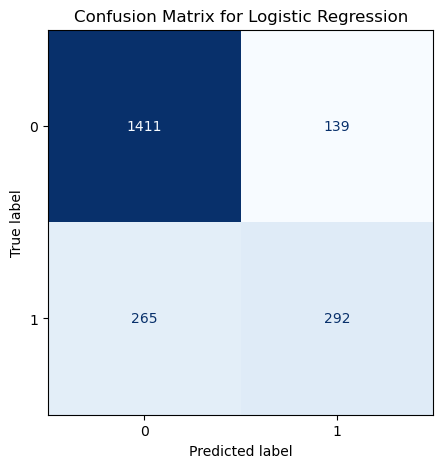

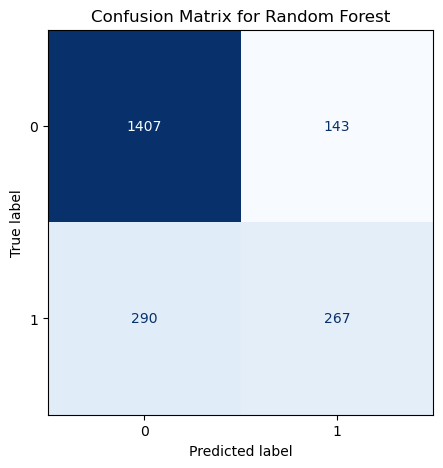

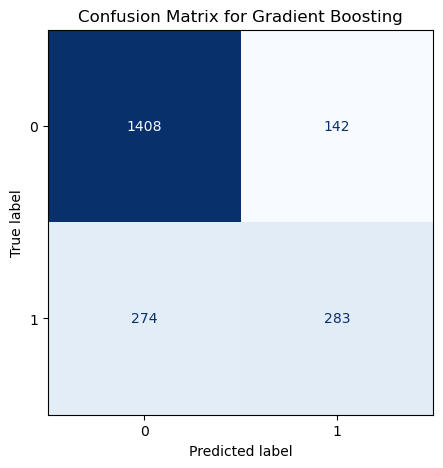

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loop through each model to plot the confusion matrix
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)  # Fit model to training data
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Generate the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix for class prediction
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    disp.plot(cmap="Blues", ax=plt.gca(), colorbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()  # Display the plot for each model


In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

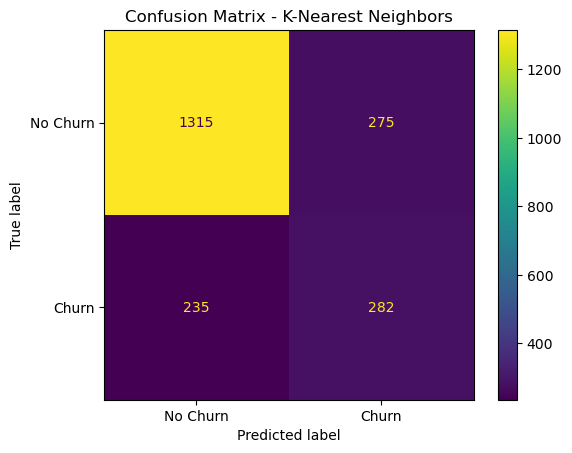

Accuracy Score Test = 0.7579496915045087
Accuracy Score Train = 0.8422873422873423




In [79]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

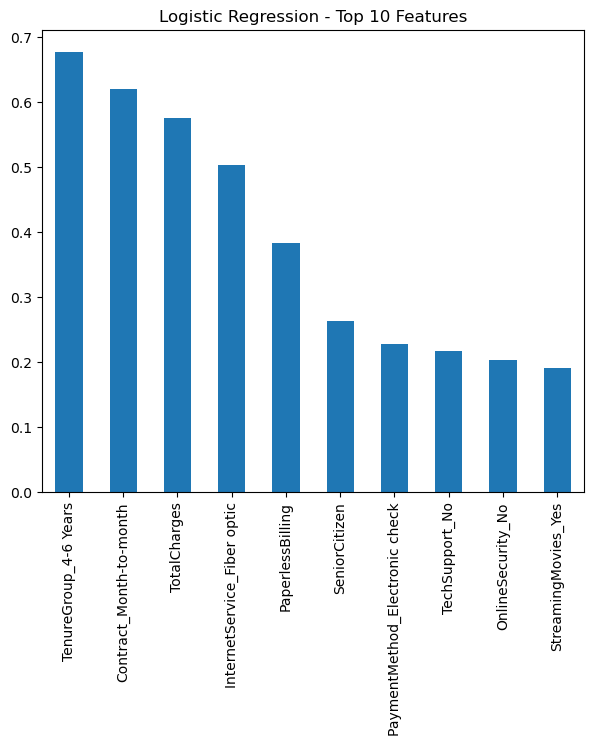

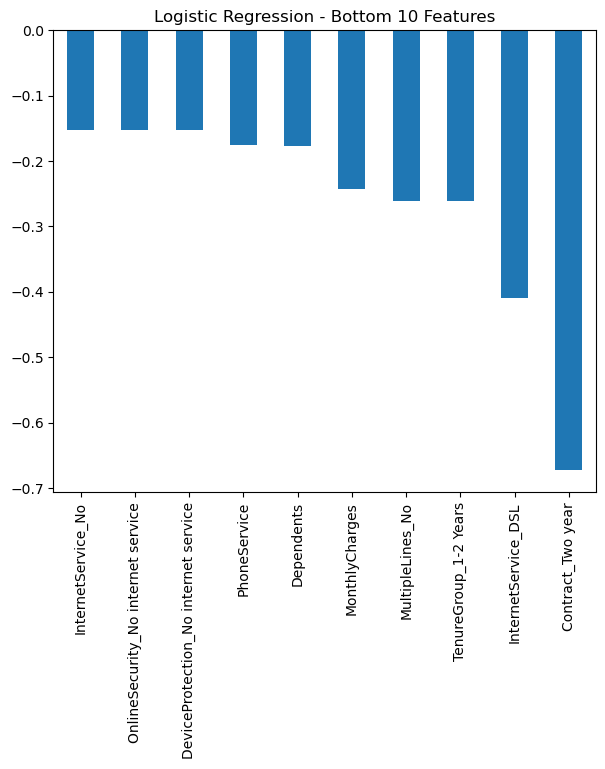

In [81]:
feature_weights(X_train,logreg,"Logistic Regression")

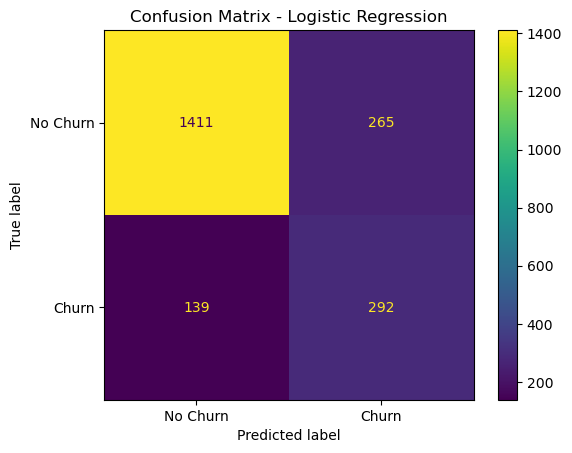

Accuracy Score Test = 0.8082581869957285
Accuracy Score Train = 0.8062678062678063




In [82]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

The confusion matrix revealed:

* True Positives (TP): The number of customers correctly predicted to churn.
* True Negatives (TN): The number of customers correctly predicted not to churn.
* False Positives (FP): The number of customers incorrectly predicted to churn.
* False Negatives (FN): The number of customers incorrectly predicted not to churn.

#### Final Model Selection
   - Based on the performance metrics, select the model with the highest accuracy and best fit to the data. Retrain the model on the entire training set with optimal hyperparameters.

To further understand the model’s performance, a confusion matrix was visualized using Seaborn. The confusion matrix helps in identifying the number of correct and incorrect predictions for each class, providing a comprehensive view of the model’s classification capability.

The confusion matrix revealed:

- True Positives (TP): The number of customers correctly predicted to churn.
- True Negatives (TN): The number of customers correctly predicted not to churn.
- False Positives (FP): The number of customers incorrectly predicted to churn.
- False Negatives (FN): The number of customers incorrectly predicted not to churn.

Insights and Interpretations

* High Accuracy: With an accuracy of 81 %, the Logistic Regression model is reliable for predicting customer churn, offering a robust tool for the business to identify at-risk customers. Although the Random Forest and Gradient Boosting were very close to 80% as well. 
* Key Factors Influencing Churn: The analysis indicated that factors like monthly charges, tenure, and contract type are critical in determining churn. Customers with higher monthly charges and shorter tenure, especially those on month-to-month contracts, are more likely to churn.
* Misclassification Analysis: The confusion matrix highlights areas where the model could be improved, such as reducing false positives and false negatives. This can guide further tuning and model enhancement efforts.

Recommendations
Based on the insights gained from the Telecom Churn Rate Dataset, here are actionable recommendations:

* Targeted Marketing: Tailor marketing campaigns based on demographic insights to address specific customer segments vulnerable to churn.

* Service Enhancements: Improve service offerings, especially internet reliability and streaming quality, to enhance customer satisfaction and retention.

* Contract Strategies: Encourage longer-term contracts with incentives to reduce churn associated with month-to-month contracts.

* Payment Methods: Promote alternative payment methods to electronic checks to potentially reduce churn rates.

* Customer Support: Enhance customer support systems, particularly for administrative issues, to improve overall service satisfaction.

In conclusion, my analysis leverages the T-mobile Churn Rate Dataset to reveal critical factors influencing customer churn, including monthly charges, tenure, and contract types. By implementing targeted marketing, enhancing service offerings, and refining customer support, telecom companies can effectively mitigate churn risks and foster long-term customer loyalty. The logistic regression, with an accuracy of 81%, provides a reliable tool for predicting churn and guiding proactive customer engagement strategies.